# Курс "Python для анализа данных"

---
# Домашнее задание PRO
#6.4 Итоговый вариант обработчика данных. Встраивание в процесс обучения модели машинного обучения

In [37]:
# Запустите код ниже для старта, но не правьте во избежания ошибок проверки!
_HOMEWORK_NAME_ = '6.4_PRO'
_HOMEWORK_ANSWER_DICT_ = dict()

## ФИО участника

In [38]:
# Введите ваше имя и фамилию в соответствующую позицию 'NAME' и 'LAST_NAME'!
_NAME_SERNAME_ = {
    'NAME' : 'Владимир',
    'LAST_NAME' : 'Доронин'
}

## Задание

**Условие:** 
На портале [Kaggle](https://www.kaggle.com) вы можете ознакомиться с доступными конкурсами. Выберите наиболее вас заинтересовавший и проделайте все шаги по его первичной обработке по аналогии с обработкой датасета с занятия, а также дополнительно сделать анализ с визуализацией. Использование в качестве подсказок блокноты других участников конкурса не запрещено! Обязательно организовать работу с данными с использованием API портала kaggle.com. Использование модели машинного обучения для предсказания добавляет дополнительные 10 баллов.

**Оценка в баллах:** 10 баллов (+10 баллов)

**Решение:**

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential # class of model
from tensorflow.keras.layers import Dense # fullconnected layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image # for add image
import numpy as np
import pandas as pd
import seaborn as sns
import pylab
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vladimirdoronin","key":"df98cb20d5ce517167ce745d9f51c270"}'}

In [4]:
# Расположение файла для аутентификации на kaggle.com
!mkdir -p ~/.kaggle
!mv -i kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c digit-recognizer
!ls

  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 86.1MB/s]
 55% 5.00M/9.16M [00:00<00:00, 9.17MB/s]
100% 9.16M/9.16M [00:00<00:00, 20.7MB/s]
 82% 5.00M/6.09M [00:01<00:00, 4.01MB/s]
100% 6.09M/6.09M [00:01<00:00, 4.85MB/s]
sample_data  sample_submission.csv  test.csv.zip  train.csv.zip


In [6]:
!unzip test.csv.zip
!unzip train.csv.zip
!ls

Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               
sample_data	       test.csv      train.csv
sample_submission.csv  test.csv.zip  train.csv.zip


In [7]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [11]:
y = train_data.label
X = train_data.drop('label', axis=1)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [17]:
x_train = x_train.values.reshape(-1, 784)
x_test = x_test.values.reshape(-1, 784)
# normalize data
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [18]:
model = Sequential() # make neuralnetwork
model.add(Dense(800, input_dim = 784, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
279/279 [==============================] - 5s 18ms/step - loss: 0.2613 - accuracy: 0.9224
Epoch 2/15
279/279 [==============================] - 5s 17ms/step - loss: 0.0970 - accuracy: 0.9714
Epoch 3/15
279/279 [==============================] - 5s 20ms/step - loss: 0.0530 - accuracy: 0.9835
Epoch 4/15
279/279 [==============================] - 5s 19ms/step - loss: 0.0361 - accuracy: 0.9888
Epoch 5/15
279/279 [==============================] - 5s 19ms/step - loss: 0.0304 - accuracy: 0.9900
Epoch 6/15
279/279 [==============================] - 6s 20ms/step - loss: 0.0175 - accuracy: 0.9942
Epoch 7/15
279/279 [==============================] - 5s 19ms/step - loss: 0.0166 - accuracy: 0.9945
Epoch 8/15
279/279 [==============================] - 5s 19ms/step - loss: 0.0183 - accuracy: 0.9941
Epoch 9/15
279/279 [==============================] - 6s 20ms/step - loss: 0.0144 - accuracy: 0.9955
Epoch 10/15
279/279 [==============================] - 5s 19ms/step - loss: 0.0104 - accura

In [20]:
test_data = test_data.values.reshape(-1, 784)
test_data = test_data.astype('float32')
test_data = test_data / 255

In [25]:
predict = model.predict(test_data)
predict.shape

(28000, 10)

In [22]:
!ls

sample_data	       test.csv      train.csv
sample_submission.csv  test.csv.zip  train.csv.zip


In [23]:
view = pd.read_csv('sample_submission.csv')
view

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [32]:
print(np.argmax(predict[23100]))

8


In [33]:
submission_one = pd.DataFrame(columns = ['ImageId', 'Label'])
for i in range(len(predict)):
  submission_one.loc[i] = [i + 1, np.argmax(predict[i])]

In [34]:
filename = 'Digit_Prediction.csv'
submission_one.to_csv(filename,index=False)
!kaggle competitions submit -c digit-recognizer -f Digit_Prediction.csv -m "SubmitFirst"

100% 208k/208k [00:00<00:00, 993kB/s]
Successfully submitted to Digit Recognizer

### Yeah! Score 0.97685

Блин! Я совсем забыл о визуализации. =( Даже хз что визуализировать в этом случае. Сделаем для галочки, что остается. =(

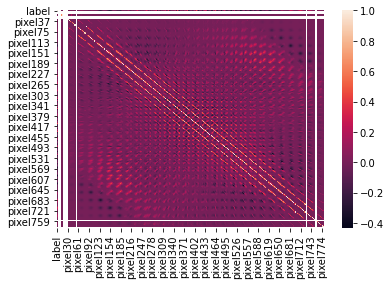

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.heatmap(train_data.corr())

Мм, ничего не понятно, но очень интересно!)))))))

## Комментарии участника

In [35]:
_YOUR_COMMENT_ = 'All right!'

## Создание отчета

In [39]:
# Проверьте правильность заполнения полей и 
# выполните данный код для создания отчета
# и сохранения на локальную машину
from google.colab import files
import json
try:
  # form a report
  _HM_REPORT_ = {'Answers':_HOMEWORK_ANSWER_DICT_,
                'Comment':_YOUR_COMMENT_,
                'User':_NAME_SERNAME_,
                }

  # create a report name
  _REPORT_NAME_ = 'HM_' +\
                    _HOMEWORK_NAME_ + \
                  '_by_' + \
                  _NAME_SERNAME_['LAST_NAME'] + \
                  '.json'
  
  # Save a report to a file
  f = open(_REPORT_NAME_,"w")
  f.write(json.dumps(_HM_REPORT_))
  f.close()

  # Donwnload the file into a local host
  files.download(_REPORT_NAME_) 
  print('Thanks for the work, {name}!'.format(name=_NAME_SERNAME_['NAME']))
except Exception as error:
   print(error)
   print('Something went wrong! Check the data entry and try again!')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Thanks for the work, Владимир!
